In [2]:
# %load /home/jonathan/.ipython/profile_default/startup/startup-01.py
# start up settings for ipython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys

plt.style.use('ggplot')
plt.rcParams['font.size'] = 15.0
plt.rcParams['axes.labelsize'] = 15.0
plt.rcParams['xtick.labelsize'] = 15.0
plt.rcParams['ytick.labelsize'] = 15.0
plt.rcParams['legend.fontsize'] = 15.0

%matplotlib inline

# set the max column width
pd.options.display.max_colwidth = 1000


In [3]:
tender_df = pd.read_csv('../../data/processed07Oct/tender.csv')
tprod_df = pd.read_csv('../../data/processed07Oct/tenderProduct.csv')

In [17]:
tsold_df = tender_df[
    (tender_df['Estado']=='Adjudicada')&
    (tender_df['AdjudicacionNumeroOferentes'] > 0)
]

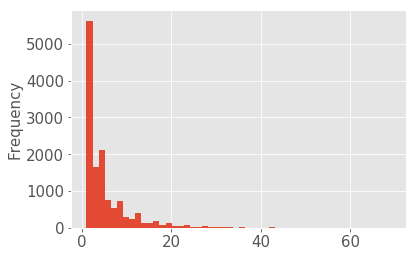

In [21]:
tsold_df['AdjudicacionNumeroOferentes'].plot.hist(bins=50)

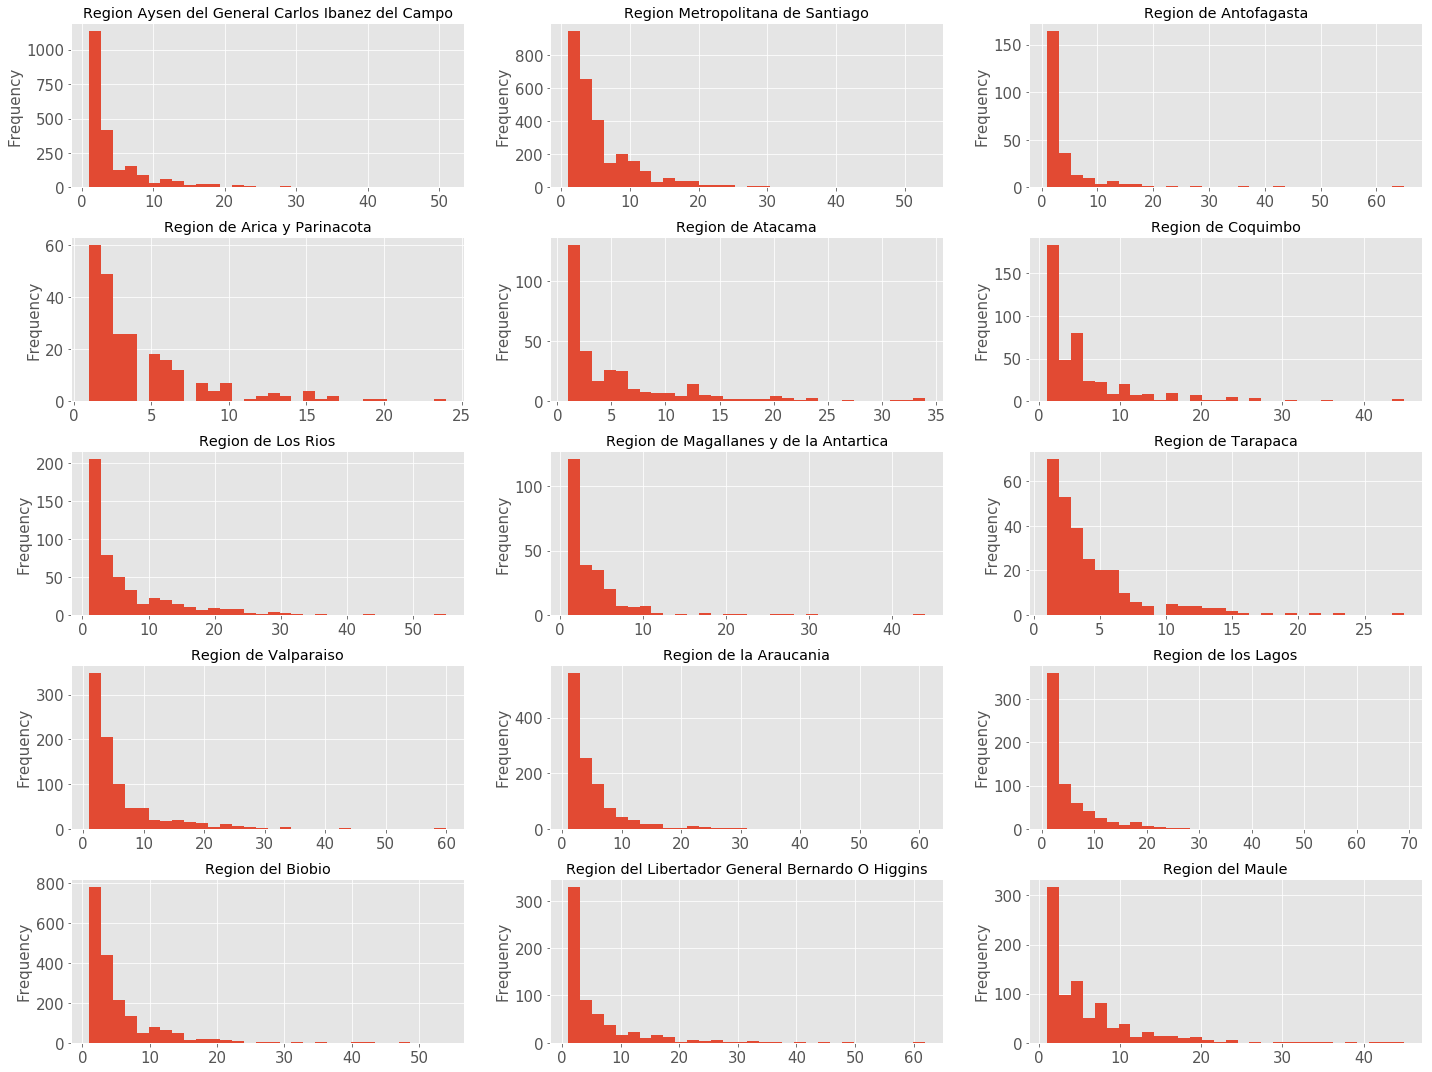

In [43]:
grouped_tsold = tsold_df[['CompradorRegionUnidad', 'AdjudicacionNumeroOferentes']] \
    .groupby('CompradorRegionUnidad')
    
fig, axes = plt.subplots(figsize=(20, 15), nrows=5, ncols=3);
cnt = 0
for name, group in grouped_tsold:
    i = cnt // 3
    j = cnt % 3
    title = name
    group.plot(kind='hist', ax=axes[i, j], bins=30, legend=None, title=title);
    cnt += 1
    
plt.tight_layout();

In [44]:
grouped_tsold.describe()

AdjudicacionNumeroOferentes  \
                                                                       count   
CompradorRegionUnidad                                                          
Region Aysen del General Carlos Ibanez del Campo                      2192.0   
Region Metropolitana de Santiago                                      2854.0   
Region de Antofagasta                                                  250.0   
Region de Arica y Parinacota                                           243.0   
Region de Atacama                                                      324.0   
Region de Coquimbo                                                     436.0   
Region de Los Rios                                                     497.0   
Region de Magallanes y de la Antartica                                 246.0   
Region de Tarapaca                                                     274.0   
Region de Valparaiso                                                   872.0   
Region de la Araucania                                                1204.0   
Region de los Lagos                                                    656.0   
Region del Biobio                                                     1905.0   
Region del Libertador General Bernardo O Higgins                       626.0   
Region del Maule                                                       849.0   

                                                                           \
                                                      mean       std  min   
CompradorRegionUnidad                                                       
Region Aysen del General Carlos Ibanez del Campo  4.602646  5.863147  1.0   
Region Metropolitana de Santiago                  5.712684  5.542760  1.0   
Region de Antofagasta                             4.532000  6.581660  1.0   
Region de Arica y Parinacota                      4.308642  3.993720  1.0   
Region de Atacama                                 5.666667  6.208952  1.0   
Region de Coquimbo                                5.408257  6.435771  1.0   
Region de Los Rios                                6.629779  7.628718  1.0   
Region de Magallanes y de la Antartica            4.048780  4.980540  1.0   
Region de Tarapaca                                4.178832  4.044730  1.0   
Region de Valparaiso                              5.731651  6.965818  1.0   
Region de la Araucania                            4.447674  5.164437  1.0   
Region de los Lagos                               5.108232  6.098344  1.0   
Region del Biobio                                 5.121260  5.689026  1.0   
Region del Libertador General Bernardo O Higgins  5.888179  7.263076  1.0   
Region del Maule                                  5.842167  6.379956  1.0   

                                                                        
                                                  25%  50%   75%   max  
CompradorRegionUnidad                                                   
Region Aysen del General Carlos Ibanez del Campo  1.0  2.0  5.00  51.0  
Region Metropolitana de Santiago                  2.0  4.0  7.00  53.0  
Region de Antofagasta                             1.0  2.5  4.00  65.0  
Region de Arica y Parinacota                      2.0  3.0  6.00  24.0  
Region de Atacama                                 2.0  3.0  7.00  34.0  
Region de Coquimbo                                1.0  3.0  6.00  45.0  
Region de Los Rios                                2.0  3.0  9.00  55.0  
Region de Magallanes y de la Antartica            1.0  3.0  5.00  44.0  
Region de Tarapaca                                1.0  3.0  5.00  28.0  
Region de Valparaiso                              2.0  3.0  6.25  60.0  
Region de la Araucania                            1.0  3.0  6.00  61.0  
Region de los Lagos                               1.0  3.0  6.00  69.0  
Region del Biobio                                 2.0  3.0  6.00  54.0  
Region del Libertador General Bernardo O Higgins  1.0

In [45]:
tsold_tids = tsold_df['CodigoExterno'].tolist()
tsprod_df = tprod_df[(tprod_df['CodigoExterno'].isin(tsold_tids))]

In [46]:
tsprod_df[
    (tsprod_df['NombreProducto']=='Juguetes didacticos')&
]

,AdjudicacionCantidad,AdjudicacionMontoUnitario,AdjudicacionNombreProveedor,AdjudicacionRutProveedor,Cantidad,Categoria,CodigoCategoria,CodigoExterno,CodigoProducto,Correlativo,Descripcion,NombreProducto,UnidadMedida
2003,1.0,5370798.0,TAIWAN LTDA,77.233.770-1,1.0,Instrumentos musicales juegos juguetes artesanias y materiales educativos / Juguetes y juegos / Juguetes,60141000,1393-69-LE16,60141006,1,1 325 JUGUETES NINOS EMBARAZADAS Y DISCAPACITADOS SEGUN DETALLE Y BASES EN ARCHIVOS ADJUNTOS OFERENTES DEBEN INGRESAR VALOR TOTAL NETO OFERTADO EN LINEA DE OFERTA,Juguetes didacticos,Global
2277,NaN,NaN,NaN,NaN,36.0,Instrumentos musicales juegos juguetes artesanias y materiales educativos / Juguetes y juegos / Juguetes,60141000,1398-172-LE16,60141006,5,SET UTENSILIOS DIDACTICOS,Juguetes didacticos,Unidad
2374,NaN,NaN,NaN,NaN,1.0,Instrumentos musicales juegos juguetes artesanias y materiales educativos / Juguetes y juegos / Juguetes,60141000,1398-187-LE16,60141006,31,SET DE 36 UTENSILIOS DIDACTICOS,Juguetes didacticos,Unidad
2781,70.0,1765.0,KRISH CHILE IMPORTACIONES LIMITADA,76.460.190-4,100.0,Instrumentos musicales juegos juguetes artesanias y materiales educativos / Juguetes y juegos / Juguetes,60141000,1437-53-LE16,60141006,1,JUGUETE O ARTICULOS DE ASEO PARA NEONATOS O NINOS EN GESTACION,Juguetes didacticos,Unidad
2782,30.0,1811.0,INVERSIONES IMPORTADORA Y EXPORTADORA MULTY LIMITADA,76.100.460-3,100.0,Instrumentos musicales juegos juguetes artesanias y materiales educativos / Juguetes y juegos / Juguetes,60141000,1437-53-LE16,60141006,1,JUGUETE O ARTICULOS DE ASEO PARA NEONATOS O NINOS EN GESTACION,Juguetes didacticos,Unidad
2783,175.0,1765.0,KRISH CHILE IMPORTACIONES LIMITADA,76.460.190-4,150.0,Instrumentos musicales juegos juguetes artesanias y materiales educativos / Juguetes y juegos / Juguetes,60141000,1437-53-LE16,60141006,2,JUGUETES APTOS PARA NINAS DE 0 A 1 ANO,Juguetes didacticos,Unidad
2784,125.0,1811.0,INVERSIONES IMPORTADORA Y EXPORTADORA MULTY LIMITADA,76.100.460-3,150.0,Instrumentos musicales juegos juguetes artesanias y materiales educativos / Juguetes y juegos / Juguetes,60141000,1437-53-LE16,60141006,2,JUGUETES APTOS PARA NINAS DE 0 A 1 ANO,Juguetes didacticos,Unidad
2785,175.0,1765.0,KRISH CHILE IMPORTACIONES LIMITADA,76.460.190-4,150.0,Instrumentos musicales juegos juguetes artesanias y materiales educativos / Juguetes y juegos / Juguetes,60141000,1437-53-LE16,60141006,3,JUGUETES APTOS PARA NINOS DE 0 A 1 ANO,Juguetes didacticos,Unidad
2786,125.0,1811.0,INVERSIONES IMPORTADORA Y EXPORTADORA MULTY LIMITADA,76.100.460-3,150.0,Instrumentos musicales juegos juguetes artesanias y materiales educativos / Juguetes y juegos / Juguetes,60141000,1437-53-LE16,60141006,3,JUGUETES APTOS PARA NINOS DE 0 A 1 ANO,Juguetes didacticos,Unidad
2787,350.0,1811.0,INVERSIONES IMPORTADORA Y EXPORTADORA MULTY LIMITADA,76.100.460-3,350.0,Instrumentos musicales juegos juguetes artesanias y materiales educativos / Juguetes y juegos / Juguetes,60141000,1437-53-LE16,60141006,4,JUGUETES APTOS PARA NINAS DE 1 A 3 ANOS,Juguetes didacticos,Unidad
